In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy

mapping = pd.read_csv('../sample_data/trial_6/mapping.csv')
edges = pd.read_csv('../sample_data/trial_6/edges.csv')

g = nx.from_pandas_edgelist(
    edges, 
    source="src", 
    target="dst",
    edge_attr="weight",
    create_using=nx.DiGraph
)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 2183
Number of edges: 54539
Average in degree:  24.9835
Average out degree:  24.9835


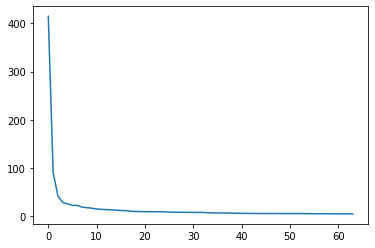

In [2]:
L = nx.laplacian_matrix(nx.Graph(g))
k = 64
w, v = scipy.sparse.linalg.eigsh(L, k=k)
plt.plot(np.arange(k), w[::-1])

In [3]:
subgraph_sizes = [8, 16, 32, 64, 128]
subgraphs = [g.subgraph(mapping.id[:k]) for k in subgraph_sizes]
print(subgraph_sizes)

[8, 16, 32, 64, 128]


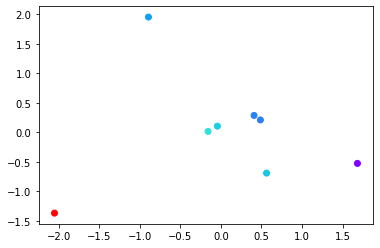

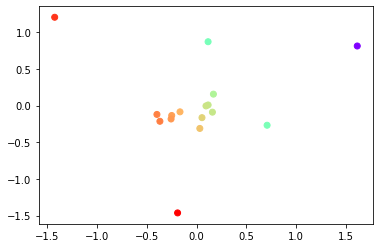

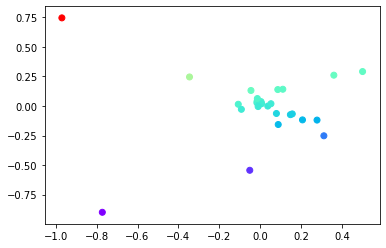

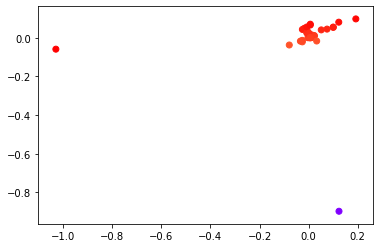

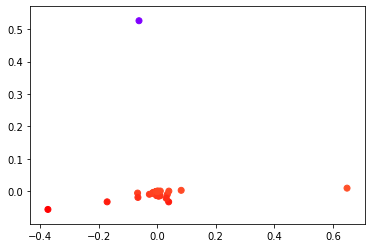

In [4]:
def laplacian_embedding(g, dim):
    L = nx.laplacian_matrix(g)
    w, v = scipy.sparse.linalg.eigsh(L, k=dim+1)
    return np.divide(v, np.sqrt(w))[::-1][:,1:]

for gs in subgraphs:
    emb = laplacian_embedding(nx.Graph(gs), 2)
    plt.clf()
    plt.scatter(emb.T[0], emb.T[1], c=emb.dot(emb[0]), cmap="rainbow")
    plt.show()

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 432x288 with 0 Axes>

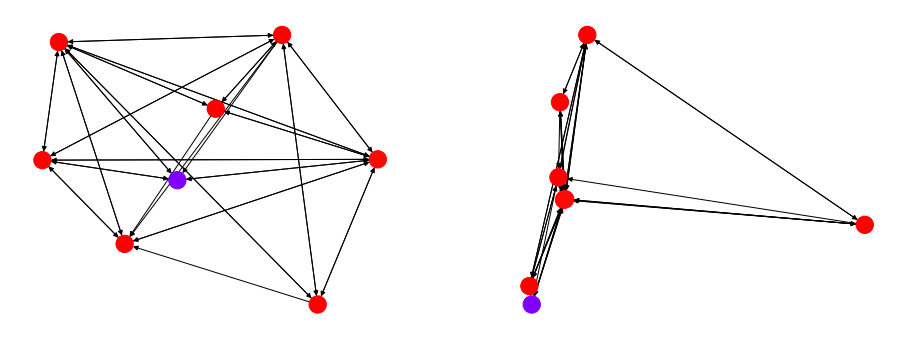

<Figure size 432x288 with 0 Axes>

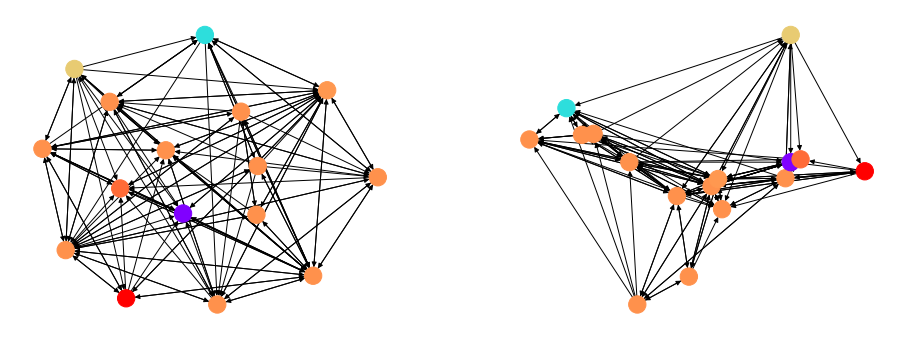

<Figure size 432x288 with 0 Axes>

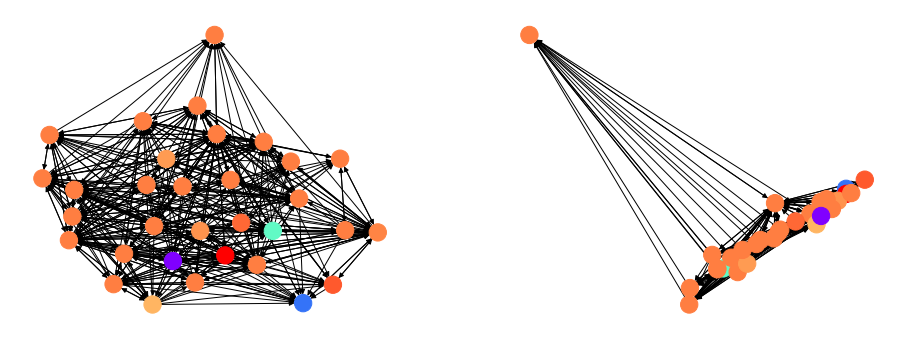

<Figure size 432x288 with 0 Axes>

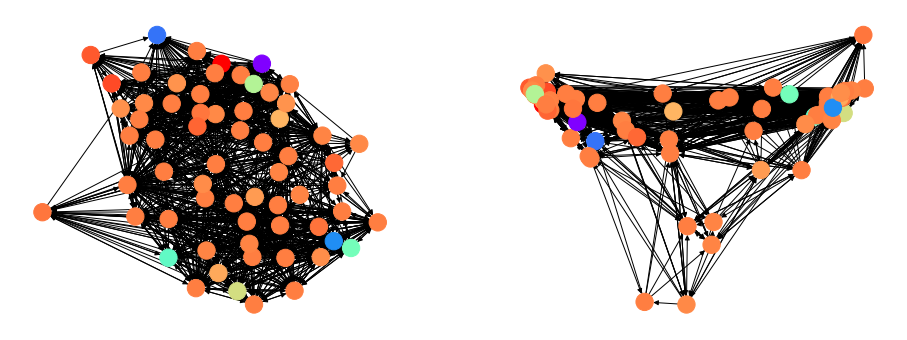

<Figure size 432x288 with 0 Axes>

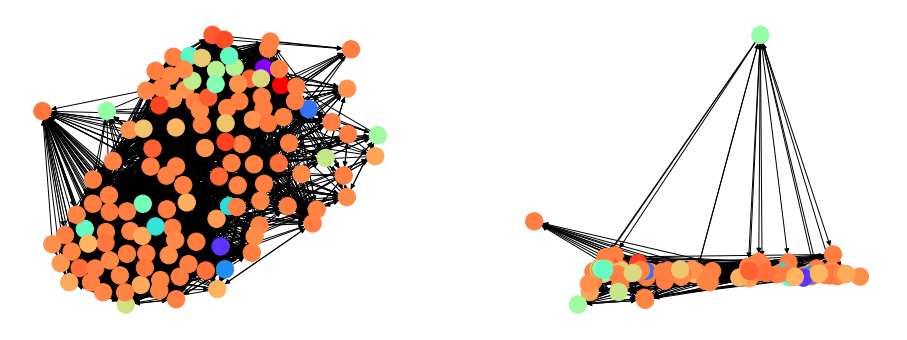

In [5]:
emb = laplacian_embedding(nx.Graph(g), 64)
sim = emb.dot(emb[0])

def draw(g):
    plt.clf()
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    nodes = mapping.id[:g.order()].tolist()
    colors = sim[:len(nodes)]
    nx.draw(g, nodelist=nodes, node_color=colors, cmap="rainbow")
    plt.subplot(122)
    nx.draw_spectral(g, nodelist=nodes, node_color=colors, cmap="rainbow")
    plt.show()

for gs in subgraphs:
    draw(gs)